BOB MODEL

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import gamma
import random

    #A function that generates a list of 1's and 0's where 1 implies a head and 0 a tail. (List of obseravtions)
def data_gen(num):
    
    #Generates a numpy array of random numbers between 0 and 1
    data = np.random.rand(num,1)
    data[data>0.5] = 1
    data[data<= 0.5] = 0

    # condition so that mean of the dataset is not the range (0..4, 0.6)
    while(data.mean() > 0.42 and data.mean() < 0.63):
        i = random.randint(0, num-1)
        data[i,0] = random.randint(0,1)
        
    return data

    #Beta function using scipy's in built gamma function
def beta(a, b, mu):
    
    coeff = ((gamma(a)*gamma(b))/gamma(a+b))

    #pdf of beta distribution at the given mu for a given value of parameters a and b
    pdf_beta = (1/coeff) * (mu**(a - 1)) * ((1 - mu)**(b - 1)) 
    
    return pdf_beta, coeff

    #Bernoulli distribution for single observation data
def bern(mu, x):
    
    pmf = (mu**x) * (1 - mu)**(1 - x)
    
    return pmf

    #Bob's approach to the problem
def bayesian_estimate(a, b, data):
    
    #intializing variables
    mu = a/(a+b)
    #lists of parameters a and b
    a_new = [a]
    b_new = [b]
    
    #prior_pdf list
    prior_beta_pdf = []
    
    #temporary variables where posterior of previous iteration is used as prior for next observation
    prior_temp, coeff = beta(a, b, mu)
    prior_beta_pdf.append(prior_temp)
    
    for x in range(len(data)):

        #proportionality of posterior distribution     post ~ prior x mle
        posterior_prob = (prior_beta_pdf[x]/coeff) * bern(mu, data[x,0])
        
        #appending new posterior parameters to list
        a_new.append(a_new[x] + data[x,0])
        b_new.append(b_new[x] + (1-data[x,0]))

        #new mu for subsquent iteration
        mu = a_new[x]/(a_new[x] + b_new[x])
        
        #updating prior beta distribution
        prior_temp , coeff = beta(a_new[x + 1], b_new[x + 1], mu)
        prior_beta_pdf.append(prior_temp)
        
    return prior_beta_pdf, a_new, b_new


data = data_gen(160)
pdf, a, b = bayesian_estimate(4, 6, data)




In [ ]:
y = []
x = np.linspace(0,1,100)
for i in range(len(x)):
    y.append(bern(x, data[0,0]))
print(len(y))
#plt.plot(x,y)
#plt.xlabel('Mean of likelihood estimator')
#plt.ylabel('Beta Distribution')
        

100


LISA MODEL

In [ ]:
#Pareto distritbution
def pareto(x, alpha, x_m):
    if x > x_m:
      pdf = alpha * (x_m**alpha) / (x)**(alpha+1)
    else:
      pdf = 0
    return pdf

In [ ]:
#bernoulli distribution for multiple observations
def bern_mult(mu, l, m):
    pmf = (mu ** (l)) * ((1 - mu) ** m)
    return pmf

In [ ]:
#Lisa's approach bayesian estimate
def Lisa(a, b, data):
    mu = a/(a + b)
    l = data.sum()
    m = data.shape[0] - l
    prior_pdf , coeff = beta(a, b, mu)
    mle = bern_mult(mu, l, m)
    posterior_prob_prop = (prior_pdf/coeff) * mle
    a_new = a + l
    b_new = b + m
    mu_new = a_new/(a_new + b_new)
    posterior_pdf , coeff = beta(a_new, b_new, mu_new)
    return posterior_pdf, a_new, b_new

Text(0, 0.5, 'Beta Distribution')

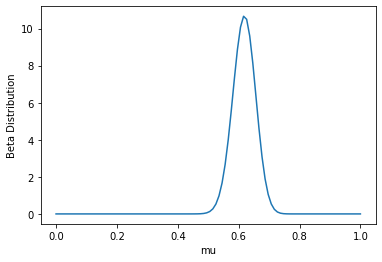

In [ ]:
#Plotting
x = np.linspace(0,1,100)
for i in range(len(x)):
    y, _ = beta(a[160], b[160], x)
plt.plot(x,y)
plt.xlabel('mu')
plt.ylabel('Beta Distribution')

        
     

GIF function

In [ ]:
from matplotlib import animation,rc
from matplotlib.animation import PillowWriter
from IPython.display import HTML, Image

rc('animation', html='html5')

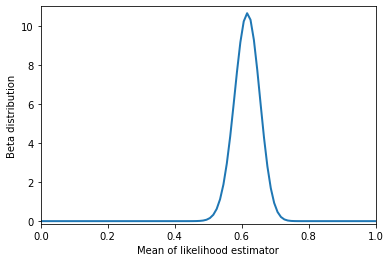

In [ ]:
#GIF Generation
fig, ax = plt.subplots()
ax.set_xlim(( 0, 1))
ax.set_ylim((-0.1365, 11))
ax.set(xlabel = 'Mean of likelihood estimator', ylabel = 'Beta distribution')

line, = ax.plot([], [], lw=2)
def init():
    line.set_data([], [])
    return (line,)
# Function used for the animation. This is called sequentially
def animate(j):
    x = np.linspace(0, 1, 100)
    for i in range(len(x)):
      y, _ = beta(a[j], b[j], x)
    line.set_data(x, y)
    return (line,)
    
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=160, interval=100, blit=True)
anim

In [ ]:
#Saving GIF
writer = PillowWriter(fps=25)  
anim.save("Animation.gif", writer=writer)